## Proyecto Analitico: Generación de Modelo Predicitivo para la adquisión de productos financieros 

### Materia: Despliegue de Modelos 

#### Desarrollado Por: 
* Daniel Martinez 
* Daniel Vargas 
* Luis Ortega 
* Ferando Vargas 

In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import statistics as st 
import missingno as msno

In [3]:
# Base de datos de entrenamiento
Train=pd.read_csv("Data/Train bank.csv")

#Informacion de la base de datos (Columnas, tipos de datos, valores nulos)
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31648 entries, 0 to 31647
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             31648 non-null  int64 
 1   Age                    31648 non-null  int64 
 2   Job                    31648 non-null  object
 3   Marital.Status         31648 non-null  object
 4   Education              31648 non-null  object
 5   Credit                 31648 non-null  object
 6   Balance..euros.        31648 non-null  int64 
 7   Housing.Loan           31648 non-null  object
 8   Personal.Loan          31648 non-null  object
 9   Contact                31648 non-null  object
 10  Last.Contact.Day       31648 non-null  int64 
 11  Last.Contact.Month     31648 non-null  object
 12  Last.Contact.Duration  31648 non-null  int64 
 13  Campaign               31648 non-null  int64 
 14  Pdays                  31648 non-null  int64 
 15  Previous           

<Axes: >

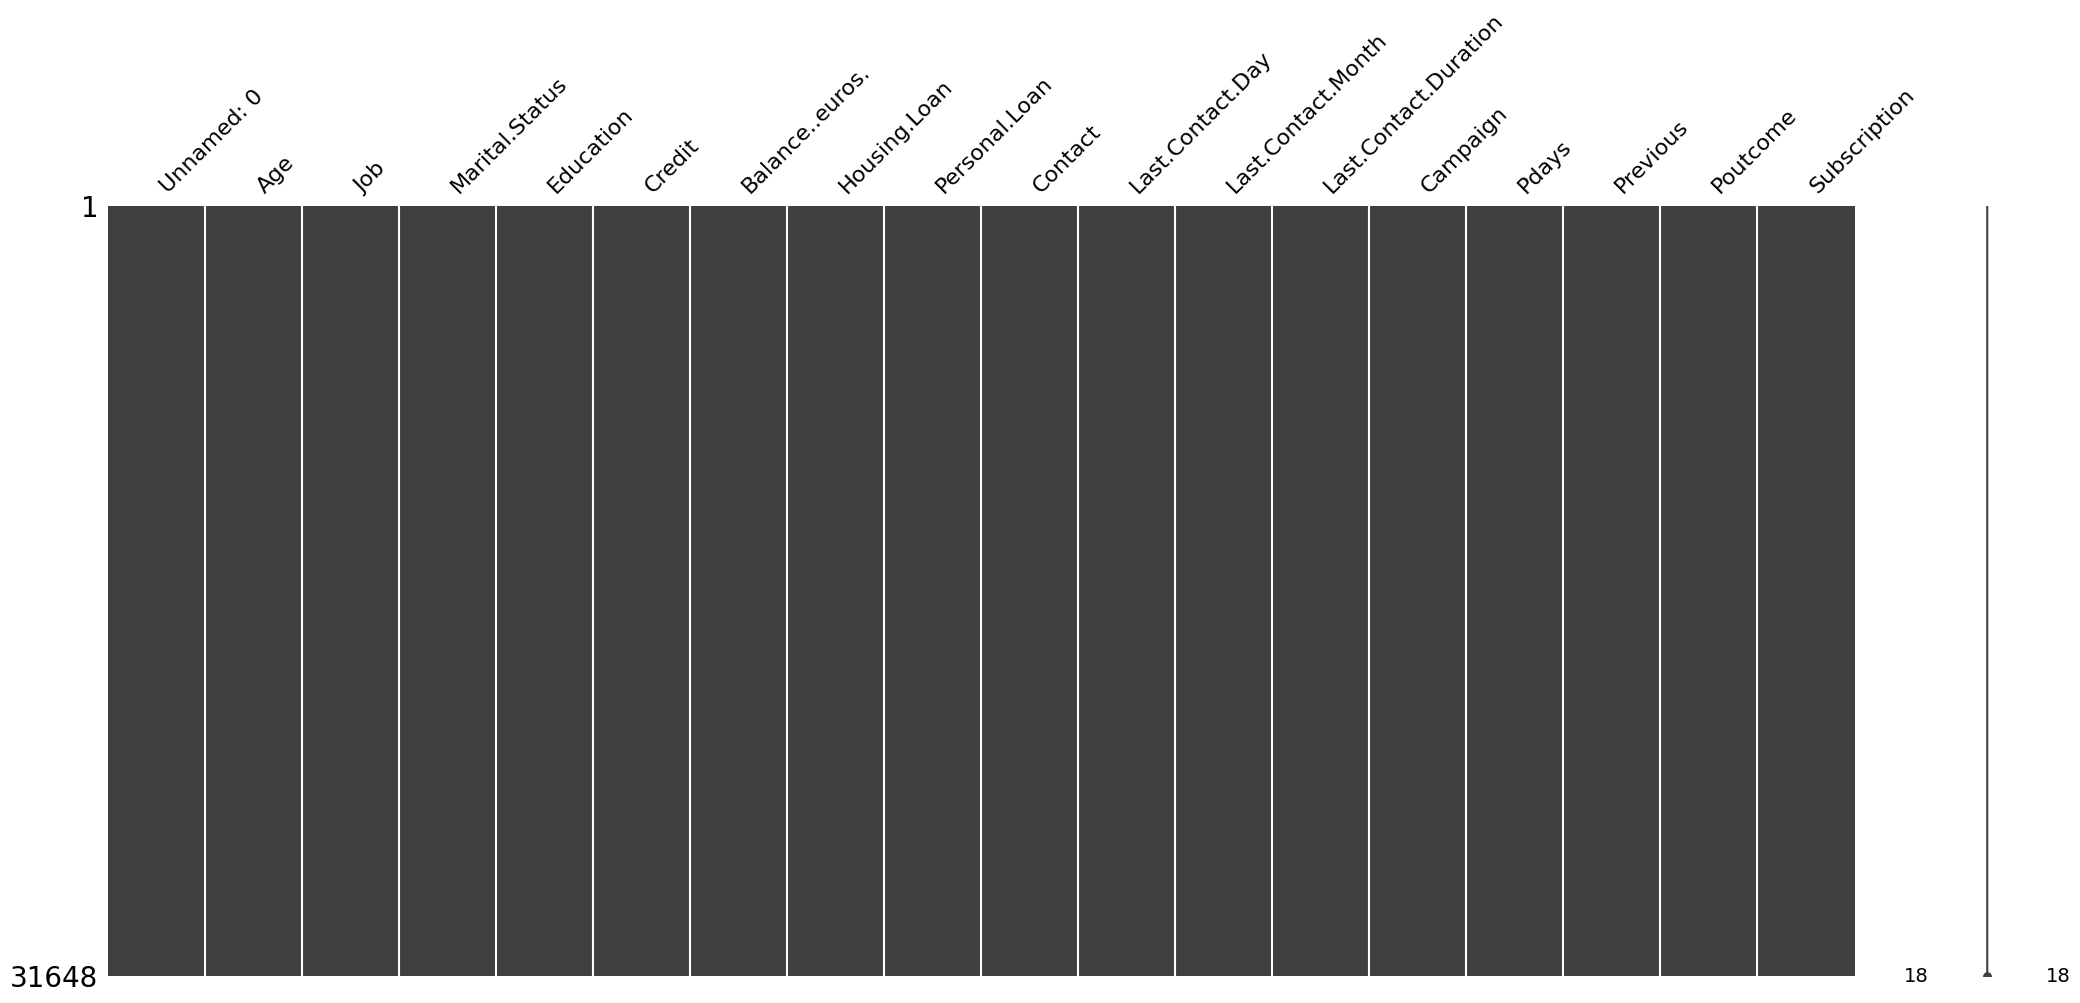

In [4]:
# Valoracion de Informacion faltante 
msno.matrix(Train)

* No se tienen valores Faltantes en la base de datos etregadas por el cliente 

In [5]:
# Banco de caracteristicas  de variables

Train = Train.astype({
    "Age": "int",
    "Job": "category",
    "Marital.Status": "category",
    "Education": "category",
    "Credit": "category",
    "Balance..euros.": "float",
    "Housing.Loan": "category",
    "Personal.Loan": "category",
    "Contact": "category",
    "Last.Contact.Day": "int",
    "Last.Contact.Month": "string",
    "Last.Contact.Duration": "float",
    "Campaign": "category",
    "Pdays": "float",
    "Previous": "int",
    "Poutcome": "category",
    "Subscription": "category"
})

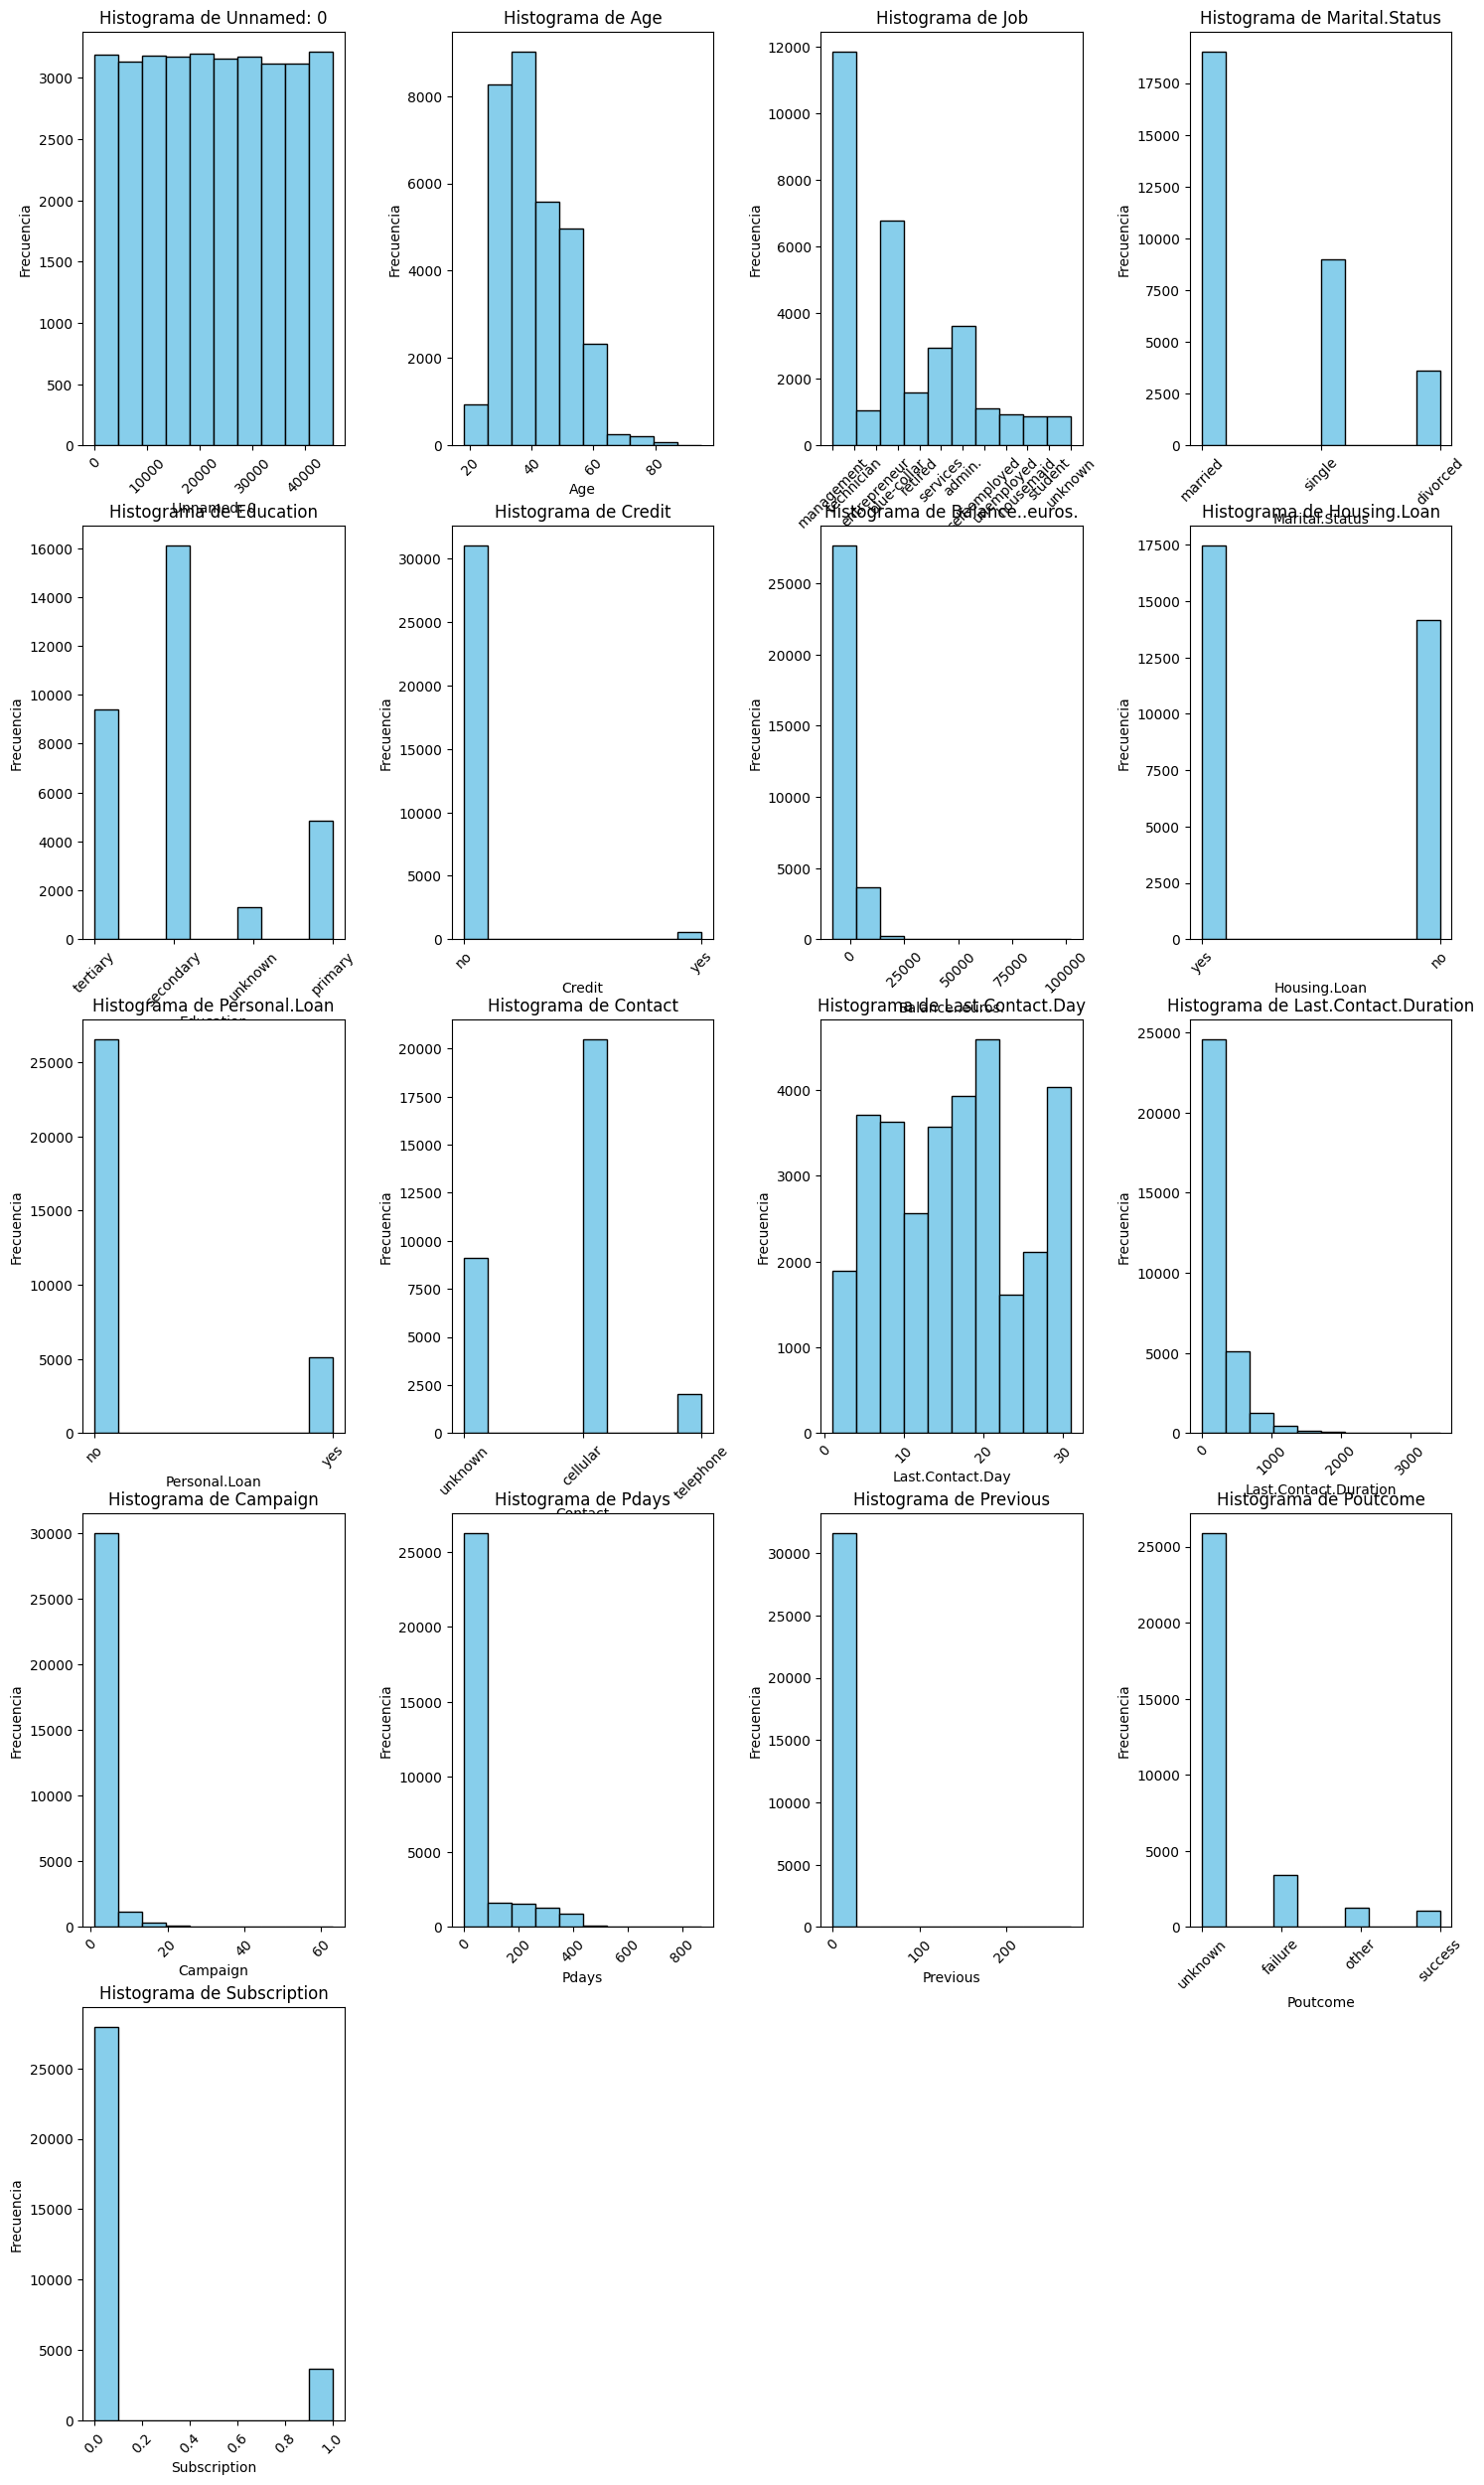

In [17]:
import matplotlib.pyplot as plt
numerical_columns = Train.select_dtypes(include=['int64',"float64","category"]).columns


n_cols = 4
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Redondeo hacia arriba para que haya suficiente espacio

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()  
# se rota a 45 grados las etiquetas del eje x



for i, col in enumerate(numerical_columns):
    axes[i].hist(Train[col].dropna(), bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espaciado entre gráficos
plt.tight_layout()
for ax in axes[:len(numerical_columns)]:
    ax.tick_params(axis='x', rotation=45)
plt.show()

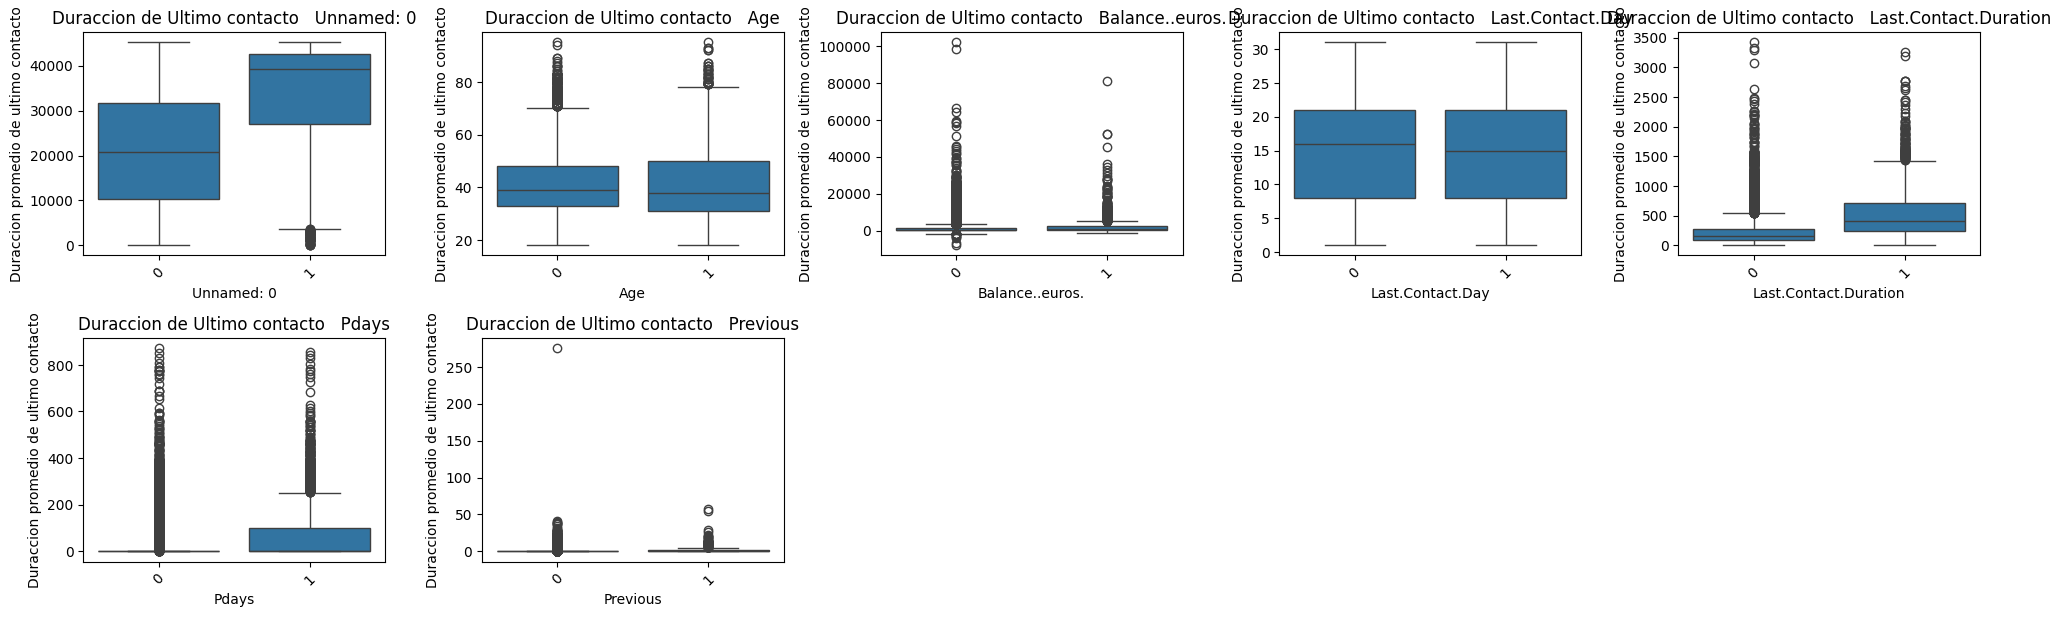

In [20]:
categorical_columns = Train.select_dtypes(include=["int64","float64"]).columns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(5, 5, i)  
    sns.boxplot(x="Subscription", y=col, data=Train)
    plt.title(f'Duraccion de Ultimo contacto   {col}')
    plt.xlabel(col)
    plt.ylabel('Duraccion promedio de ultimo contacto')
    plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()

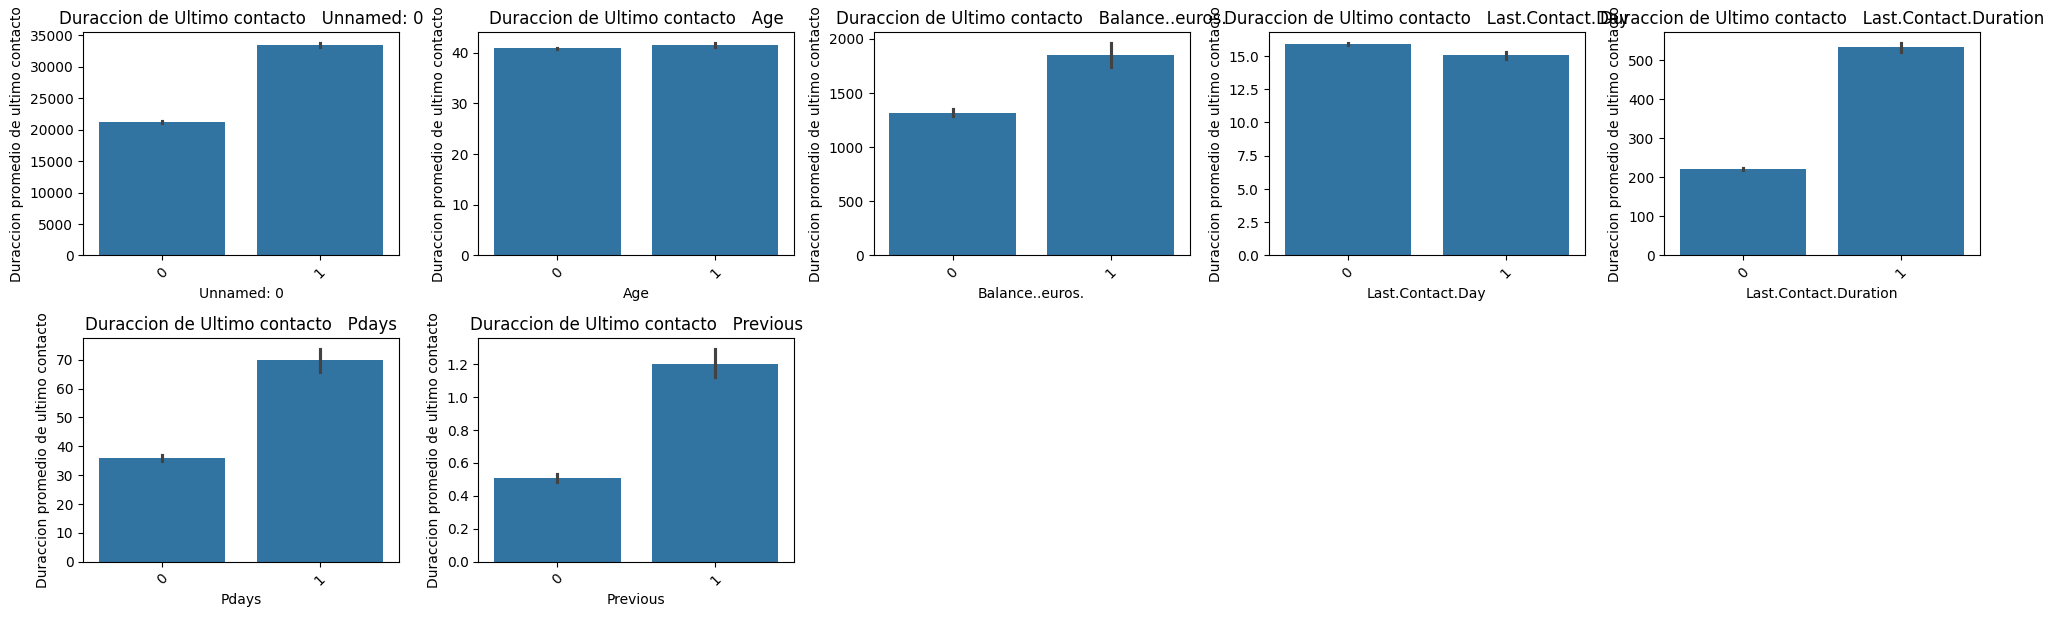

In [21]:
categorical_columns = Train.select_dtypes(include=["int64","float64"]).columns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(5, 5, i)  
    sns.barplot(x="Subscription", y=col, data=Train)
    plt.title(f'Duraccion de Ultimo contacto   {col}')
    plt.xlabel(col)
    plt.ylabel('Duraccion promedio de ultimo contacto')
    plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()

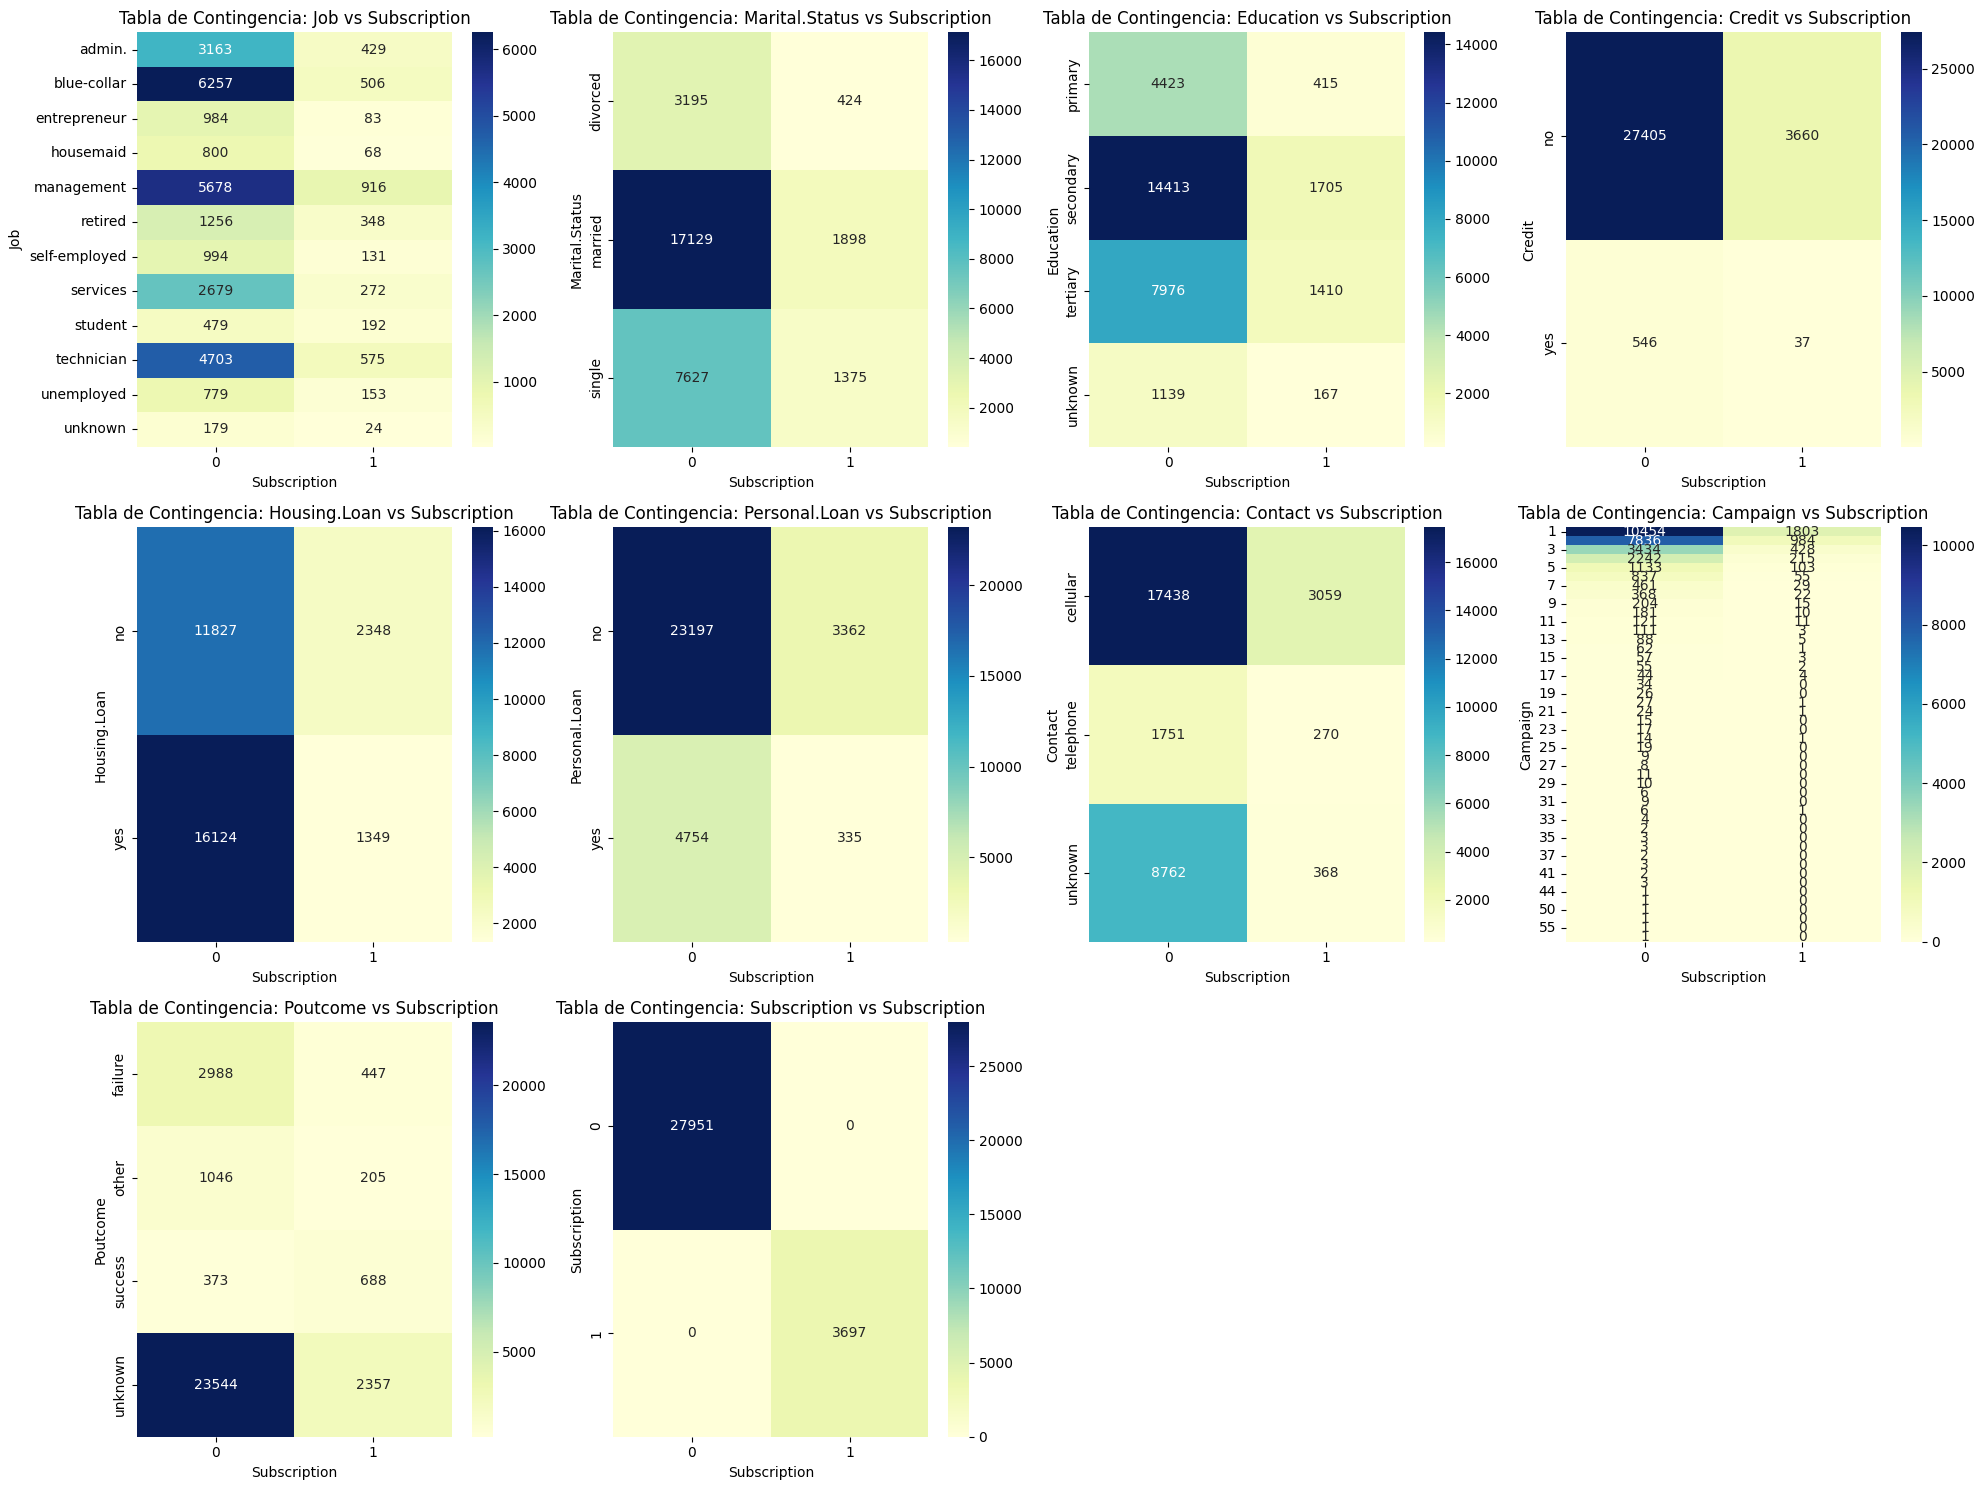

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables categóricas a analizar (excluyendo 'Subscription')
categorical_columns = Train.select_dtypes(include=["category"]).columns

# Número de columnas en la matriz de imágenes
num_columns = 4  # Puedes ajustar este número según tu preferencia
num_rows = (len(categorical_columns) + num_columns - 1) // num_columns  # Calcular el número de filas necesarias

# Crear figura y ejes
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 5))
axes = axes.flatten()  # Aplanar la matriz de ejes para facilitar la iteración

# Crear imágenes para cada tabla de contingencia
for i, column in enumerate(categorical_columns):
    # Generar tabla de contingencia
    contingency_table = pd.crosstab(Train[column], Train["Subscription"])

    # Crear gráfica de calor
    sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d", cbar=True, ax=axes[i])
    axes[i].set_title(f'Tabla de Contingencia: {column} vs Subscription')
    axes[i].set_xlabel("Subscription")
    axes[i].set_ylabel(column)

# Eliminar ejes vacíos si los hay
for j in range(i + 1, num_rows * num_columns):
    fig.delaxes(axes[j])

plt.tight_layout()  
plt.show()  

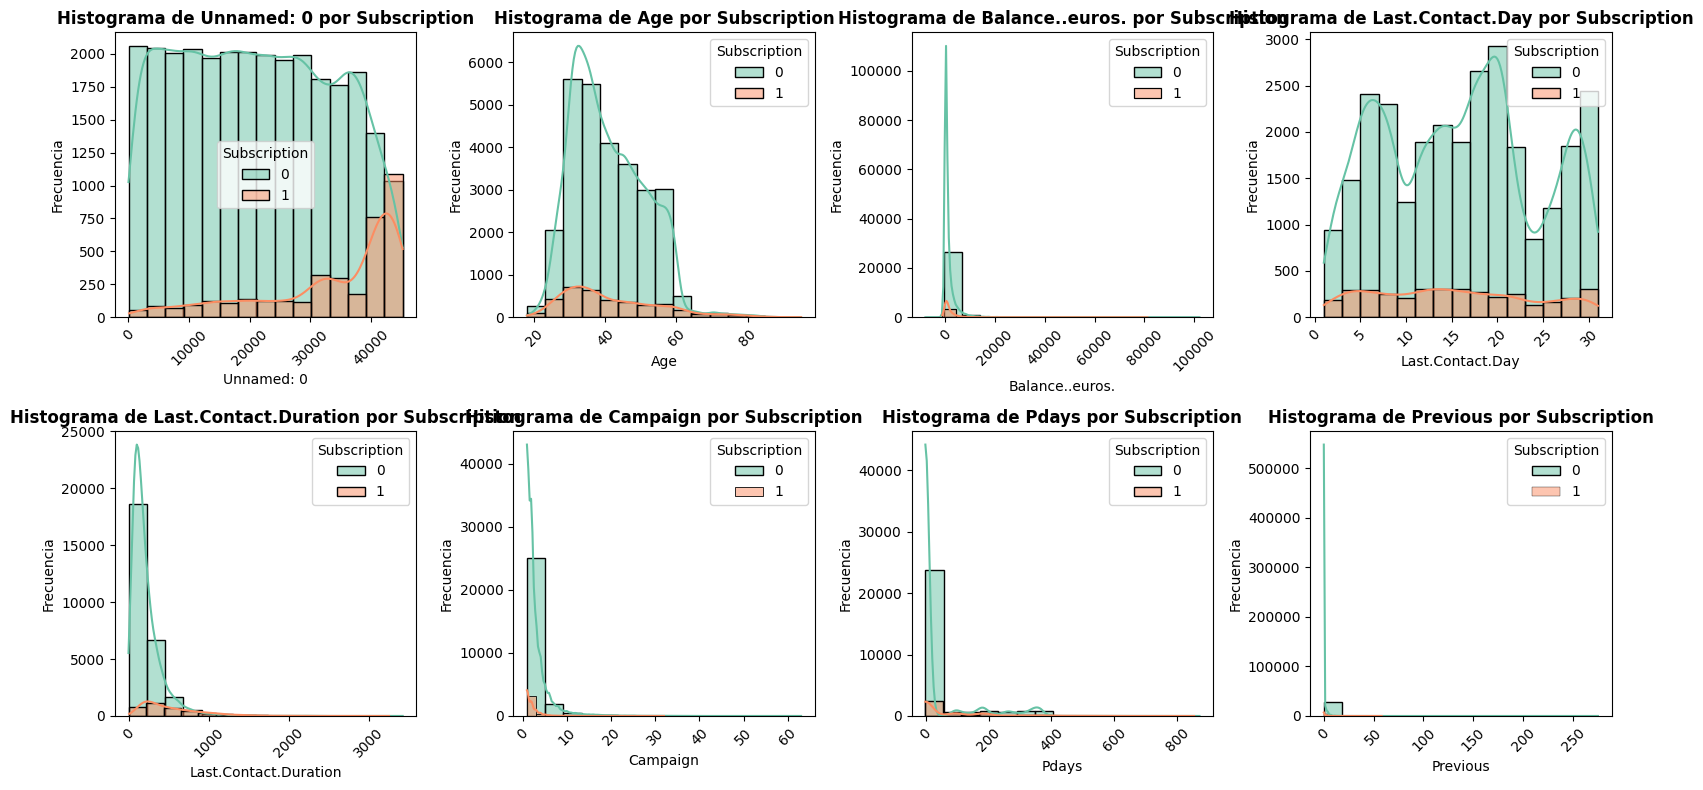

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = Train.select_dtypes(include=['int64', 'float64']).columns
Train['Subscription'] = Train['Subscription'].astype('category')
n_cols = 4
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    ax = axes[i]
    for color, subscription_status in zip(palette, Train['Subscription'].cat.categories):
        subset = Train[Train['Subscription'] == subscription_status]
        sns.histplot(
            subset[col].dropna(),
            bins=15,
            alpha=0.5,
            label=str(subscription_status),
            ax=ax,
            color=color,
            kde=True
        )
    ax.set_title(f'Histograma de {col} por Subscription', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
    ax.legend(title='Subscription')
    ax.tick_params(axis='x', rotation=45)


for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
